In [43]:
import pandas as pd
from sklearn import datasets, linear_model
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [16]:
data = pd.read_csv('advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
data.shape

(200, 4)

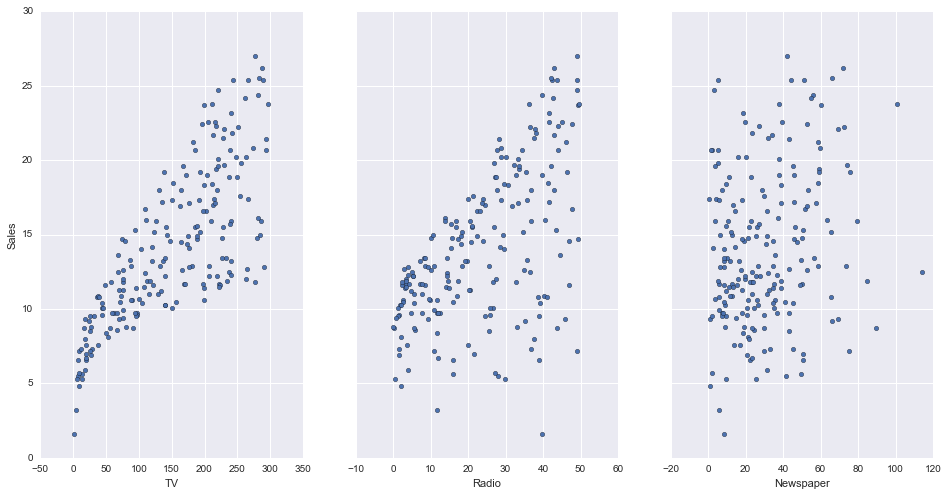

In [23]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [30]:

def linear_least_squares(df, fn):
    sales = data.index.map(fn)
    diffs = data['TV'] - sales
    diffs_squared = diffs ** 2
    return diffs_squared.sum() / (2 * len(diffs))

In [39]:
# attempt1 = lambda x: 0.25 * x + 0

# print(linear_least_squares(data['Sales'], attempt1))

# plt.scatter(data.index, data['Sales'])
# plt.plot(data.index, attempt1(data.index))

In [44]:
regr = linear_model.LinearRegression()

In [51]:
new_frame = data[['TV', 'Radio', 'Newspaper']]

In [47]:
new_frame.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [48]:
new_frame.set_index('TV')

,Sales
TV,
230.1,22.1
44.5,10.4
17.2,9.3
151.5,18.5
180.8,12.9
8.7,7.2
57.5,11.8
120.2,13.2
8.6,4.8


In [62]:
regr.fit(new_frame, data['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
regr.predict(new_frame)

array([ 20.52397441,  12.33785482,  12.30767078,  17.59782951,
        13.18867186,  12.47834763,  11.72975995,  12.12295317,
         3.72734086,  12.55084872,   7.0322992 ,  17.28512918,
        10.57712073,   8.82630048,  18.43436638,  20.81929952,
        12.82365674,  23.22495716,   9.95168206,  14.16607293,
        18.10076728,  14.7405382 ,   6.4891503 ,  16.5459329 ,
         8.14651887,  15.6100386 ,  14.98951429,  17.05167344,
        19.41053803,   9.14402389,  21.6339338 ,  11.3460929 ,
         7.63888314,  18.86426829,   7.57483051,  17.00682618,
        23.40590052,  15.62347779,   9.90868103,  20.44761039,
        16.37766467,  17.2959832 ,  21.59580326,  13.96385684,
         8.88787996,  15.16152314,   8.87338673,  21.7226299 ,
        16.26362018,   8.1681656 ,  12.63121132,   9.33981296,
        20.66297563,  19.94469957,  20.37443008,  21.2926106 ,
         8.52771254,  12.77458802,  21.89805198,  18.13348698,
         5.74215558,  22.89067208,  16.78426073,  13.21

In [67]:
regr.predict([[100, 25, 25]])

array([ 12.20266701])